<a href="https://colab.research.google.com/github/spencergoldberg1/Data-Science/blob/develop/Emotion_Recognition_Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from google.colab import drive
from torchsummary import summary

In [ ]:
# 1. Mount Google Drive
drive.mount('/content/gdrive')

# 2. Load labeled images from folders
# data_dir = '/content/gdrive/MyDrive/Data1/antsbeesdataset'
data_dir = '/content/gdrive/MyDrive/DataSci/FacialRecognition'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/DataSci/FacialRecognition

/content/gdrive/MyDrive/DataSci/FacialRecognition


In [ ]:
ls

alexnet_classification_emotions.pth  train/  valid/


In [ ]:
# 3. Pre-process the data and create data loaders
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
image_datasets = {x: datasets.ImageFolder(data_dir + '/' + x, data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=16, shuffle=True, num_workers=4) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# 4. Set up the AlexNet architecture
alexnet = models.alexnet(pretrained=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:

num_ftrs = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(num_ftrs, len(class_names)) # Change last layer
alexnet = alexnet.to(device) # Put on GPU

In [ ]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
summary(alexnet, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
class_names

['happy', 'sad']

In [ ]:
dataset_sizes

{'train': 140, 'valid': 80}

In [ ]:
for inputs, labels in dataloaders["train"]:
        inputs = inputs.to(device)
        labels = labels.to(device)

In [ ]:
inputs.shape

torch.Size([12, 3, 224, 224])

In [ ]:
labels.shape

torch.Size([12])

In [ ]:
labels

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0], device='cuda:0')

In [ ]:
outputs = alexnet(inputs)

In [ ]:
outputs.shape

torch.Size([12, 2])

In [ ]:
outputs

tensor([[-0.0583, -1.2135],
        [-0.1347, -0.8724],
        [ 0.2018, -0.6816],
        [ 0.2930, -1.4065],
        [ 0.2813,  0.0804],
        [ 0.0400, -0.6818],
        [-0.0708, -1.1513],
        [-0.2405, -0.2585],
        [-0.9378,  0.3594],
        [-0.0472, -0.9422],
        [ 0.0250, -1.6339],
        [ 0.2266, -1.3791]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
torch.max(outputs,1)[0]

tensor([-0.0583, -0.1347,  0.2018,  0.2930,  0.2813,  0.0400, -0.0708, -0.2405,
         0.3594, -0.0472,  0.0250,  0.2266], device='cuda:0',
       grad_fn=<MaxBackward0>)

In [ ]:
torch.max(outputs,1)[1]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], device='cuda:0')

In [ ]:
preds = torch.max(outputs, 1)[1]

In [ ]:
preds

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], device='cuda:0')

In [ ]:
labels

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0], device='cuda:0')

In [ ]:
preds == labels

tensor([ True,  True, False,  True,  True,  True,  True,  True, False, False,
        False,  True], device='cuda:0')

In [ ]:
labels.shape[0]

12

In [ ]:
torch.sum(preds == labels)/labels.shape[0]

tensor(0.6667, device='cuda:0')

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

# Train the AlexNet model
alexnet.train()

num_epochs = 20

for epoch in range(num_epochs):
    print(epoch, " of ", num_epochs - 1)
    print('-' * 10)

    running_corrects = 0

    for inputs, labels in dataloaders["train"]:
        inputs = inputs.to(device)
        labels = labels.to(device)

        

        outputs = alexnet(inputs)
        preds = torch.max(outputs, 1)[1]



        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_corrects += torch.sum(preds == labels.data)

    print('Train Acc: {:.4f}'.format(running_corrects / dataset_sizes["train"]))




    # Evaluate the AlexNet model on Validation Data
    alexnet.eval()

    running_corrects = 0

    for inputs, labels in dataloaders["valid"]:
        inputs = inputs.to(device)
        labels = labels.to(device)


        outputs = alexnet(inputs)
        preds = torch.max(outputs, 1)[1]


        running_corrects += torch.sum(preds == labels.data)

    acc_valid = running_corrects / dataset_sizes["valid"]
    print('Valid Acc: {:.4f}'.format(acc_valid))
    if acc_valid > 0.99:
        print("Done!")
        break


print('Training complete')

0  of  19
----------
Train Acc: 0.5286
Valid Acc: 0.5000
1  of  19
----------
Train Acc: 0.6214
Valid Acc: 0.5750
2  of  19
----------
Train Acc: 0.6929
Valid Acc: 0.5375
3  of  19
----------
Train Acc: 0.7429
Valid Acc: 0.5125
4  of  19
----------
Train Acc: 0.7643
Valid Acc: 0.5875
5  of  19
----------
Train Acc: 0.7714
Valid Acc: 0.5750
6  of  19
----------
Train Acc: 0.7714
Valid Acc: 0.5375
7  of  19
----------
Train Acc: 0.8500
Valid Acc: 0.5500
8  of  19
----------
Train Acc: 0.8571
Valid Acc: 0.5500
9  of  19
----------
Train Acc: 0.8929
Valid Acc: 0.5625
10  of  19
----------
Train Acc: 0.7714
Valid Acc: 0.5750
11  of  19
----------
Train Acc: 0.8000
Valid Acc: 0.5625
12  of  19
----------
Train Acc: 0.8214
Valid Acc: 0.5500
13  of  19
----------
Train Acc: 0.9143
Valid Acc: 0.5625
14  of  19
----------
Train Acc: 0.9143
Valid Acc: 0.5625
15  of  19
----------
Train Acc: 0.9143
Valid Acc: 0.5625
16  of  19
----------
Train Acc: 0.9214
Valid Acc: 0.5625
17  of  19
----------
Tr

In [ ]:
pwd

In [ ]:
model_path = '/content/gdrive/MyDrive/DataSci/FacialRecognition/alexnet_classification_emotions.pth'

In [ ]:
# Save the trained model
torch.save(alexnet.state_dict(), model_path)

In [ ]:
ls

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import imageio as io
import matplotlib.pyplot as plt
# 1. Load the trained AlexNet model
def load_model(model_path):
    model = models.alexnet()
    num_ftrs = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_ftrs, len(class_names))
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model.to(device)

# 2. Define a function to load an image from a URL and preprocess it
def preprocess_image(url, transform):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img_tensor = transform(img)
    return img_tensor.unsqueeze(0).to(device)

# 3. Perform inference using the loaded model
def predict_image_url(url, model):
    img_tensor = preprocess_image(url, data_transforms['valid'])
    output = model(img_tensor)
    pred = torch.max(output, 1)[1]
    return class_names[pred]

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(3, 5)
    plt.show()

In [ ]:
trained_model = load_model(model_path)

In [ ]:
urls = ['https://cdn.tinybuddha.com/wp-content/uploads/2016/01/Happy-Guy.jpg', 
        'https://personalexcellence.co/files/girl-smiling2.jpg', 
        'https://images.ctfassets.net/zkw0qlnf0vqv/psycom_page_fid6015_asset_6012/520ec3ffba27a19963640bfe09d2bbb7/51079685-depressed-teenage-girl-and-her-mothers-support', 
        'https://media.premiumtimesng.com/wp-content/files/2022/07/Photo-of-sad-man-used-to-illustrate-the-story-Source-_-Abayomiajayi.com_.ng_.jpg', 
        'https://assets.entrepreneur.com/content/3x2/2000/20180627194538-GettyImages-828514788.jpeg', 
        'https://hips.hearstapps.com/menshealth-uk/main/thumbs/30587/Smilingman.jpg',
        'https://sa1s3optim.patientpop.com/assets/images/provider/photos/2197018.jpg'
        ]

<ipython-input-133-40e23e8c936b>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread(image_url)


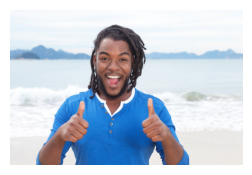

The predicted class for the input image is: happy


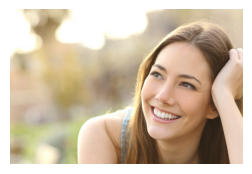

The predicted class for the input image is: happy


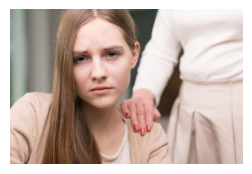

The predicted class for the input image is: sad


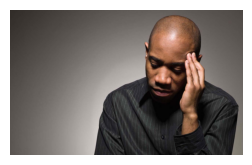

The predicted class for the input image is: sad


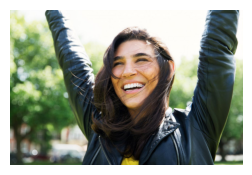

The predicted class for the input image is: happy


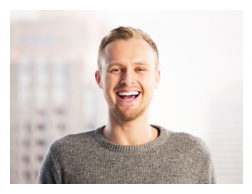

The predicted class for the input image is: happy


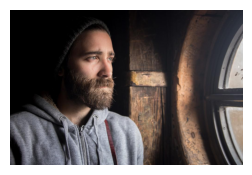

The predicted class for the input image is: sad


In [ ]:
for image_url in urls:
  image = io.imread(image_url)
  plot(image)
  prediction = predict_image_url(image_url, trained_model)
  print("The predicted class for the input image is:", prediction)